### Hodgedecomposition

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from pytspl import load_dataset, SCPlot

sc, coordinates, _ = load_dataset("paper")

# create a plot
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


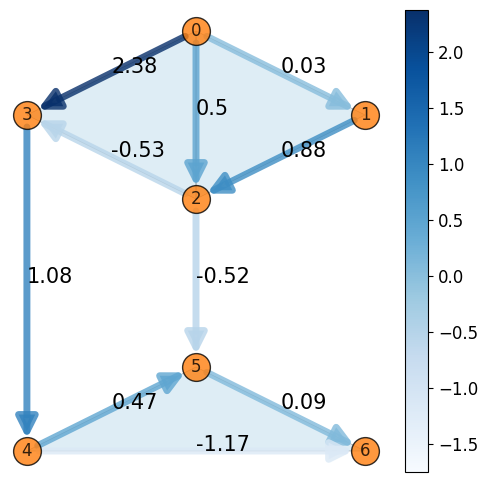

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

# intial flow f
synthetic_flow = np.array([0.03, 0.5, 2.38, 0.88, -0.53, -0.52, 1.08, 0.47, -1.17, 0.09])

scplot.draw_network(edge_flow=synthetic_flow, ax=ax)

In [4]:
from pytspl.decomposition.hodgedecomposition import get_divergence
# divergence
B1 = sc.incidence_matrix(rank=1)
get_divergence(B1, synthetic_flow)

array([-2.91, -0.85,  2.43,  0.77,  1.78, -0.14, -1.08])

In [5]:
f_h = sc.get_hodgedecomposition(flow=synthetic_flow, component="harmonic")
f_g = sc.get_hodgedecomposition(flow=synthetic_flow, component="gradient")
f_c = sc.get_hodgedecomposition(flow=synthetic_flow, component="curl")

# gradient component
print("Gradient component: ", f_g)
# curl component
print("Curl component: ", f_c)
# harmonic component
print("Harmonic component: ", f_h)

Gradient component:  [ 0.25  1.34  1.32  1.1  -0.02  0.03  0.53 -0.47 -0.78 -0.3 ]
Curl component:  [-0.15 -0.7   0.85 -0.15 -0.85  0.    0.    0.58 -0.58  0.58]
Harmonic component:  [-0.07 -0.14  0.21 -0.07  0.34 -0.55  0.55  0.37  0.18 -0.18]


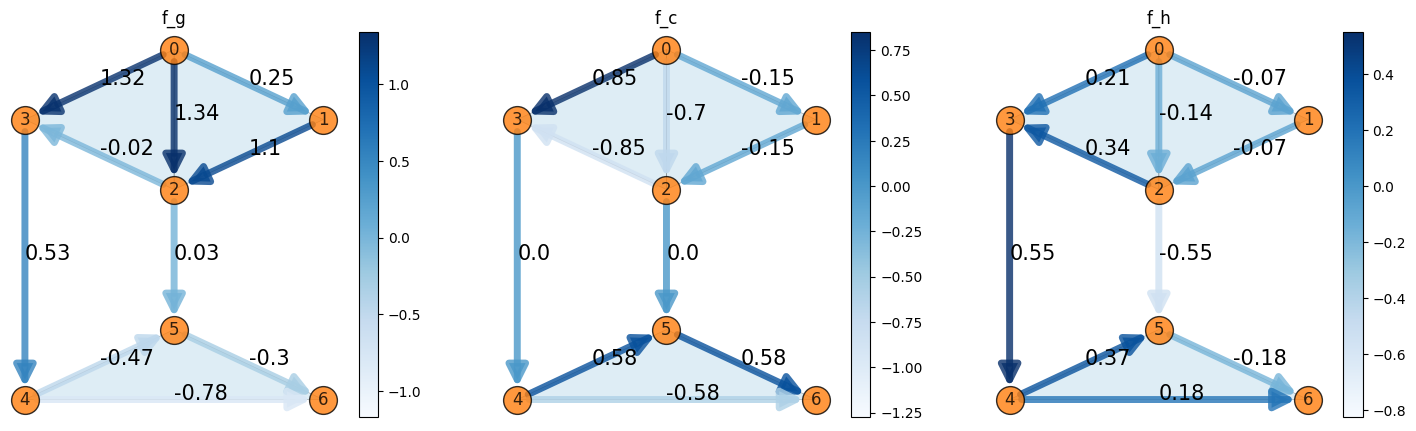

In [15]:


# plot the hodge decomposition
scplot.draw_hodge_decomposition(flow=synthetic_flow, figsize=(18, 5))

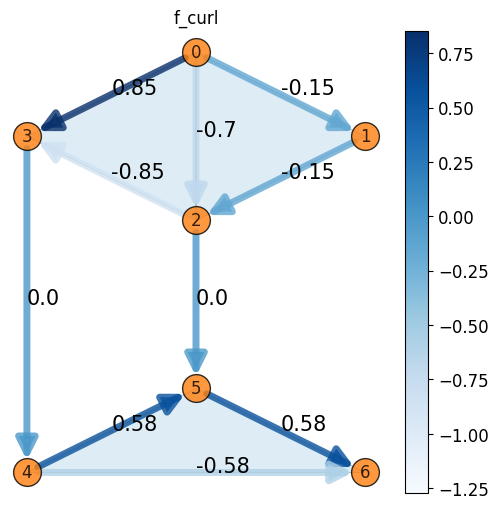

In [16]:
# plot only the gradient component
scplot.draw_hodge_decomposition(synthetic_flow, component="curl", figsize=(6, 6))